In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/advertising/Advertising.csv


is there a relationship between marketing means and sales?

In [2]:
df = pd.read_csv('/kaggle/input/advertising/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df['total_spend'] = df['TV'] + df['newspaper'] + df['radio']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


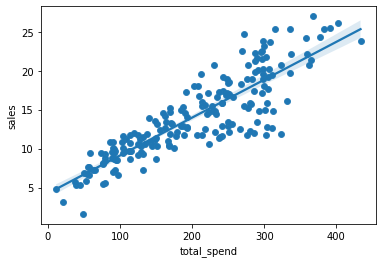

In [4]:
sns.scatterplot( data = df , x = 'total_spend' , y = 'sales'); 
sns.regplot( data = df , x = 'total_spend' , y = 'sales'); 

In [5]:
X = df['total_spend']
y = df['sales']

In [6]:
# y = mx + b
# y = B0 + B1x
# help(np.polyfit)

In [7]:
np.polyfit( X, y, deg = 1 )

array([0.04868788, 4.24302822])

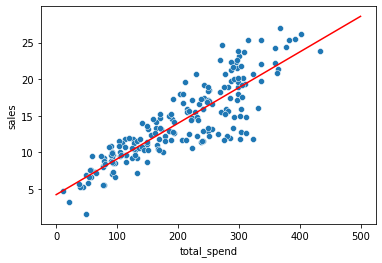

In [8]:
potential_spend = np.linspace(0 , 500 , 100 )
predicted_sales = 4.24302822 + 0.04868788*potential_spend

sns.scatterplot( data = df , x = 'total_spend' , y = 'sales'); 
plt.plot( potential_spend , predicted_sales, color = 'red'); 

In [9]:
spend = 200
predicted_sales = 4.24302822 + 0.04868788*spend

predicted_sales

13.98060422

In [10]:
# returns X in order of devreasing power
# y = B3*x**3 + B2*x**2 + B1X + B0
np.polyfit(X , y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

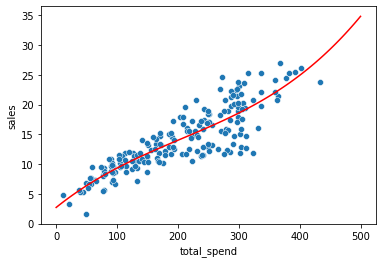

In [11]:
pot_spend = np.linspace( 0 ,500 ,100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00
sns.scatterplot( data = df , x = 'total_spend' , y = 'sales');
plt.plot( pot_spend , pred_sales , color = 'red');